# ID5030 Assignment - 3    

### Implementation of gradient descent and its variants
    
Name: P Akhil Reddy   
Roll Number: CH20B076 

### Importing libraries and loading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
mpl.rcParams['font.size'] = 18

In [3]:
df = pd.read_excel('Concrete_Data.xls')

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
X = df.drop(columns=['Concrete compressive strength(MPa, megapascals) '], axis = 1).values
y = df['Concrete compressive strength(MPa, megapascals) '].values

In [6]:
# X_old is the dataset which does not contain the column of ones, will be kept for later use
X_old = X 
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Solution to Question 1

## 1 - a. Implementing batch gradient descent for linear regression in python, without batch normalisation.

In [8]:
# Learning rate
lr = 1e-6

# Number of data points in train and test datasets
N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Initialising the weights to zero
w = np.zeros(9)

n_epochs = 20000

errors = []
epochs = []

In [9]:
# Function defining mean square error
def MSE(y_pred, y_org):
    return ((y_pred - y_org)**2).mean()

In [10]:
# Function which contains the implementation of gradient descent algorithm
def GD_Algo(X_train, lr, normalised = False):
    w = np.zeros(9)

    n_epochs = 20000

    # Array containing epoch numbers and mean squared errors
    errors = []

    # Algorithm for updating the parameters of the regression model
    for epoch in range(n_epochs):
        y_train_pred = X_train@w

        w = w - (lr/N_train)*(X_train.T)@(X_train@w - y_train)

        error = MSE(y_train_pred, y_train)

        if(epoch%1000 == 0):
            # print('MSE at epoch {}: {}'.format(epoch, error))
            errors.append(error)

    mse_train = errors[-1]
    
    if normalised:
        y_test_pred = X_test_normalised@w
    else:
        y_test_pred = X_test@w
    mse_test = MSE(y_test_pred, y_test)
    print('For learning rate {}, final MSE for train dataset: {}'.format(lr, mse_train))
    print('For learning rate {}, final MSE for test dataset: {}'.format(lr, mse_test))
    print('\n')

    return errors


For learning rate 1e-12, final MSE for train dataset: 1508.9609899587456
For learning rate 1e-12, final MSE for test dataset: 1416.8515838660146


For learning rate 1e-10, final MSE for train dataset: 287.911327725169
For learning rate 1e-10, final MSE for test dataset: 276.26446395906487


For learning rate 1e-08, final MSE for train dataset: 161.54053204031092
For learning rate 1e-08, final MSE for test dataset: 163.38303624833853


For learning rate 1e-06, final MSE for train dataset: 108.53725789169951
For learning rate 1e-06, final MSE for test dataset: 107.4160837160931




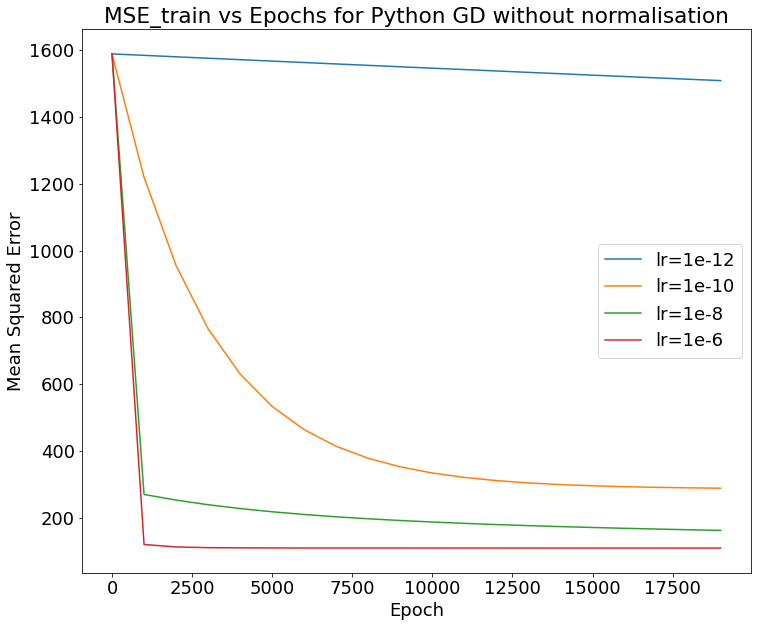

In [11]:
# We will use this array for plotting MSEs for all learning rates in a single figure
epochs = list(range(0, 20000, 1000))

# Running the algorithm for different values of learning rate and storing the error values
errors1 = GD_Algo(X_train, 1e-12)
errors2 = GD_Algo(X_train, 1e-10)
errors3 = GD_Algo(X_train, 1e-8)
errors4 = GD_Algo(X_train, 1e-6)

# Plotting the error values vs the epoch numbers
fig, ax = plt.subplots()

ax.plot(epochs, errors1)
ax.plot(epochs, errors2)
ax.plot(epochs, errors3)
ax.plot(epochs, errors4)

ax.set_title('MSE_train vs Epochs for Python GD without normalisation')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.legend(['lr=1e-12', 'lr=1e-10', 'lr=1e-8', 'lr=1e-6']);

/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/tmp/ipykernel_2712741/395029525.py:3: RuntimeWarning: overflow encountered in square
  return ((y_pred - y_org)**2).mean()
/tmp/ipykernel_2712741/1427075882.py:12: RuntimeWarning: overflow encountered in matmul
  y_train_pred = X_train@w
/tmp/ipykernel_2712741/1427075882.py:14: RuntimeWarning: overflow encountered in matmul
  w = w - (lr/N_train)*(X_train.T)@(X_train@w - y_train)
/tmp/ipykernel_2712741/1427075882.py:14: RuntimeWarning: invalid value encountered in matmul
  w = w - (lr/N_train)*(X_train.T)@(X_train@w - y_train)


For learning rate 1e-05, final MSE for train dataset: nan
For learning rate 1e-05, final MSE for test dataset: nan




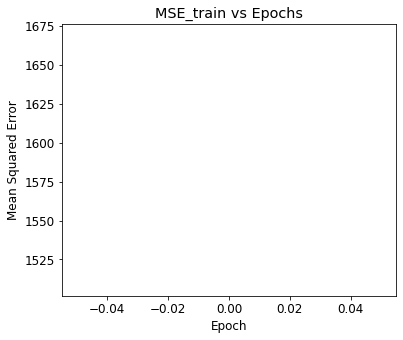

In [12]:
# Running the algorithm for learning rate 1e-5 and plotting the errors vs epoch numbers
errors5 = GD_Algo(X_train, 1e-5);

with mpl.rc_context({'figure.figsize': (6, 5), 'font.size': 12}):
    fig, ax = plt.subplots(figsize = (6, 5))

    ax.plot(epochs, errors5)
    ax.set_title('MSE_train vs Epochs')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Mean Squared Error')

### It is observed that the performance of gradient descent algorithm improves with increase in the learning rate until it crosses a certain value of order 10<sup>-6</sup>. Beyond the learning rate of that value, overflow error is encountered due to large values of parameters. Unstable behaviour - Moving away from the global minimum.

## 1 - b. Implementation of batch gradient descent with batch normalisation.
### Note: The function GD_Algo which was defined from scratch in part a will also be used here for convenience.

In [13]:
# X_old is the dataset which does not contain the column of ones
# Here we take the old X matrix again which was stored in X_old
X = X_old

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.3, random_state=42)

mean_train = X_train_new.mean(axis = 0)
std_train = X_train_new.std(axis = 0)

mean_test = X_test_new.mean(axis = 0)
std_test = X_test_new.std(axis = 0)

In [14]:
std_train

array([108.28616112,  87.65648309,  63.66316251,  21.14527675,
         6.04217219,  78.4547443 ,  80.06990752,  61.607975  ])

In [15]:
std_test

array([94.48912573, 82.77664023, 64.37853015, 21.79434437,  5.79607734,
       75.92493664, 80.10867734, 66.5665785 ])

#### Since none of the standard deviation values are zero, we don't have to add any extra term into the denominator to prevent division by zero.

In [16]:
# Performing batch normalisation for the train and test data
X_train_normalised = (X_train_new - mean_train)/(std_train)
X_test_normalised = (X_test_new - mean_test)/(std_test)

In [17]:
# Adding a column of ones to the train and test matrices
X_train_normalised = np.hstack([np.ones((X_train_normalised.shape[0], 1)), X_train_normalised])
X_test_normalised = np.hstack([np.ones((X_test_normalised.shape[0], 1)), X_test_normalised])

#### Note that we have performed the batch normalisation only after splitting the data, because we don't want any information from test dataset to enter the train dataset in any manner.

### Now the gradient descent algorithm is run with different learning rates and results obtained are compared.

For learning rate 1e-08, final MSE for train dataset: 1588.4019295646222
For learning rate 1e-08, final MSE for test dataset: 1497.5767375005694


For learning rate 1e-06, final MSE for train dataset: 1533.129111057854
For learning rate 1e-06, final MSE for test dataset: 1441.5801988407525


For learning rate 0.0001, final MSE for train dataset: 148.61511183460712
For learning rate 0.0001, final MSE for test dataset: 135.4504921314043


For learning rate 0.01, final MSE for train dataset: 107.25848191573412
For learning rate 0.01, final MSE for test dataset: 113.95304690982732




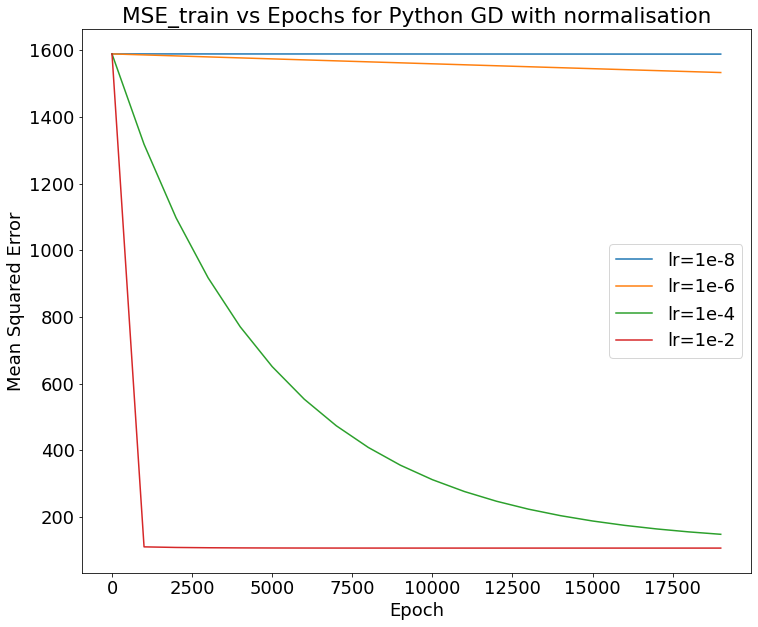

In [18]:
# We will use this array for plotting MSEs for all learning rates in a single figure
epochs = list(range(0, 20000, 1000))

errors1 = GD_Algo(X_train_normalised, 1e-8, normalised = True)
errors2 = GD_Algo(X_train_normalised, 1e-6, normalised = True)
errors3 = GD_Algo(X_train_normalised, 1e-4, normalised = True)
errors4 = GD_Algo(X_train_normalised, 1e-2, normalised = True)

fig, ax = plt.subplots()

ax.plot(epochs, errors1)
ax.plot(epochs, errors2)
ax.plot(epochs, errors3)
ax.plot(epochs, errors4)

ax.set_title('MSE_train vs Epochs for Python GD with normalisation')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error');
ax.legend(['lr=1e-8', 'lr=1e-6', 'lr=1e-4', 'lr=1e-2']);

For learning rate 0.9, final MSE for train dataset: 1.594577122991181e+22
For learning rate 0.9, final MSE for test dataset: 2.4823803377657684e+23




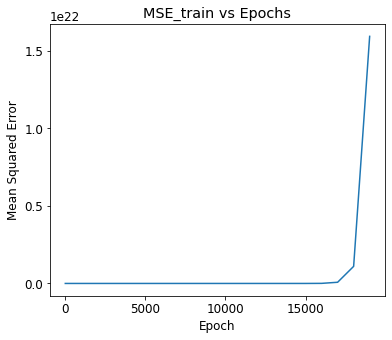

In [19]:
# Running the algorithm again for learning rate = 0.9 and plotting the error vs epoch number
errors5 = GD_Algo(X_train_normalised, 0.9, normalised = True);

with mpl.rc_context({'figure.figsize': (6, 5), 'font.size': 12}):
    fig, ax = plt.subplots(figsize = (6, 5))

    ax.plot(epochs, errors5)
    ax.set_title('MSE_train vs Epochs')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Mean Squared Error')

#### It is observed that the performance of the gradient descent algorithm improves as the learning rate increases upto a certain extent(around 0.89-0.9), beyond that value overflow error is encountered because of very large values of weights. Unstable behaviour - Moving away from the global minimum.

#### Moreover, it is also observed that we can test larger values of learning rate when batch normalisation is done. This is because all the values of each feature will stay in only the same range so the functioning of the GD algorithm is more stable.

## 1 - c. Implementation of batch gradient descent using PyTorch.
### Part i. Without batch normalisation.

In [20]:
# Converting the dataset into tensor format
inputs_train = torch.from_numpy(X_train)
inputs_test = torch.from_numpy(X_test)

labels_train = torch.from_numpy(y_train)
labels_test = torch.from_numpy(y_test)

In [21]:
# Function defining mean square error
def mse_error(y_pred, y_true):
    return torch.mean((y_pred - y_true)**2)

# Function which contains the implementation of the batch gradient descent algorithm in PyTorch
def torch_GD(X_train, lr, normalised = False):
    # NOTE : w also contains the coefficient for bias term b because there is a column of ones already included in the train dataset
    w = torch.zeros(9, 1, dtype = torch.double, requires_grad = True)

    num_epochs = 20000

    losses = []

    # Train the model
    for epoch in range(num_epochs):

        y_pred = (X_train@w).reshape(-1)

        loss = mse_error(y_pred, labels_train)

        loss.backward()

        with torch.no_grad():
            w -= lr*w.grad

            w.grad.zero_()

        if (epoch + 1) % 1000 == 0:
            losses.append(loss.item())

    mse_train = losses[-1]
    if normalised:
        outputs_test = (inputs_test_normalised@w).reshape(-1)
    else:
        outputs_test = (inputs_test@w).reshape(-1)
    mse_test = mse_error(outputs_test, labels_test)
    print('For learning rate {}, final MSE for train dataset: {}'.format(lr, mse_train))
    print('For learning rate {}, final MSE for test dataset: {}'.format(lr, mse_test))
    print('\n')

    return losses

### Running the batch gradient descent for 3 different learning rates and comparing the results.

/usr/local/lib/python3.8/dist-packages/torch/autograd/__init__.py:147: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:115.)
  Variable._execution_engine.run_backward(


For learning rate 1e-09, final MSE for train dataset: 226.96045394156548
For learning rate 1e-09, final MSE for test dataset: 223.91329800970826


For learning rate 1e-08, final MSE for train dataset: 137.98115497449461
For learning rate 1e-08, final MSE for test dataset: 142.4976632562509


For learning rate 1e-07, final MSE for train dataset: 109.19972422078459
For learning rate 1e-07, final MSE for test dataset: 107.92549330132525




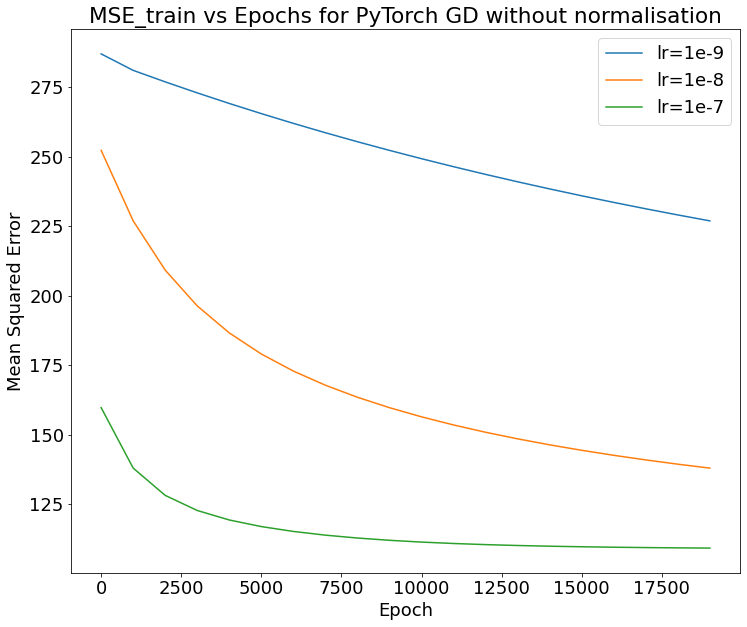

In [22]:
# We will use this array for plotting MSEs for all learning rates in a single figure
epochs = list(range(0, 20000, 1000))

losses1 = torch_GD(inputs_train, lr = 1e-9)
losses2 = torch_GD(inputs_train, lr = 1e-8)
losses3 = torch_GD(inputs_train, lr = 1e-7)

fig, ax = plt.subplots()

ax.plot(epochs, losses1)
ax.plot(epochs, losses2)
ax.plot(epochs, losses3)

ax.set_title('MSE_train vs Epochs for PyTorch GD without normalisation')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error');
ax.legend(['lr=1e-9', 'lr=1e-8', 'lr=1e-7']);

For learning rate 1e-06, final MSE for train dataset: nan
For learning rate 1e-06, final MSE for test dataset: nan




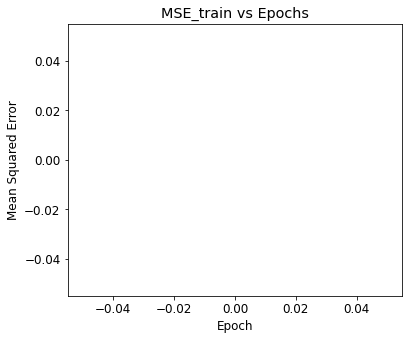

In [23]:
# Running the algorithm for learning rate = 1e-6 and plotting the errors vs epoch numbers
losses4 = torch_GD(inputs_train, 1e-6);

with mpl.rc_context({'figure.figsize': (6, 5), 'font.size': 12}):
    fig, ax = plt.subplots(figsize = (6, 5))

    ax.plot(epochs, losses4)
    ax.set_title('MSE_train vs Epochs')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Mean Squared Error')

#### It is observed that the performance of the GD algortihm improves with the increase in learning rate upto a certain level. At around learning rate of 10<sup>-6</sup>, overflow error is encountered. Unstable behaviour is due to the parameter value moving away from the point of global minimum.

### Part ii. With batch normalisation.

In [24]:
inputs_train_normalised = torch.from_numpy(X_train_normalised)
inputs_test_normalised = torch.from_numpy(X_test_normalised)

For learning rate 1e-07, final MSE for train dataset: 1577.0336015956145
For learning rate 1e-07, final MSE for test dataset: 1486.6496677346458


For learning rate 1e-06, final MSE for train dataset: 1473.8995014985894
For learning rate 1e-06, final MSE for test dataset: 1387.3195566323172


For learning rate 0.0001, final MSE for train dataset: 114.46759206643878
For learning rate 0.0001, final MSE for test dataset: 115.54312480428393


For learning rate 0.1, final MSE for train dataset: 107.25842311011506
For learning rate 0.1, final MSE for test dataset: 113.97291597990562




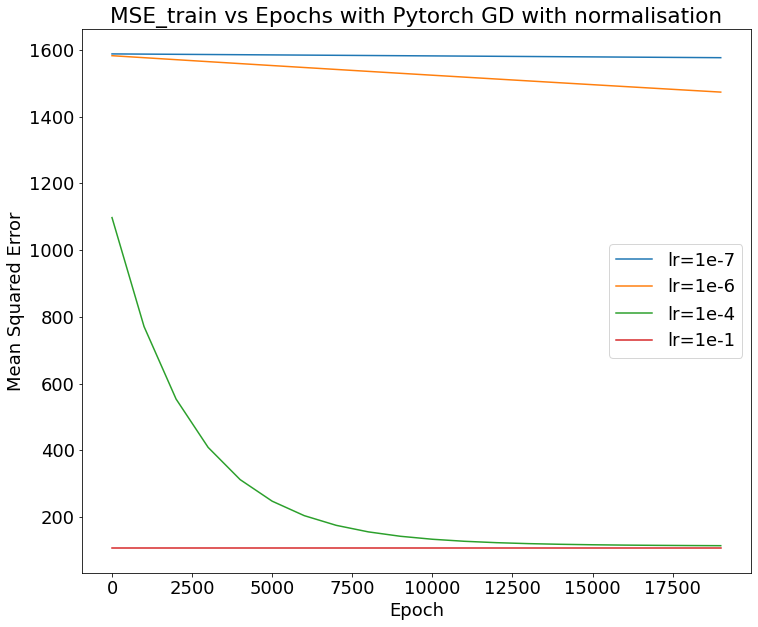

In [25]:
# Running the algorithm for different values of learning rates and plotting the errors vs epoch numbers
losses1 = torch_GD(inputs_train_normalised, lr = 1e-7, normalised = True)
losses2 = torch_GD(inputs_train_normalised, lr = 1e-6, normalised = True)
losses3 = torch_GD(inputs_train_normalised, lr = 1e-4, normalised = True)
losses4 = torch_GD(inputs_train_normalised, lr = 1e-1, normalised = True)

fig, ax = plt.subplots()

ax.plot(epochs, losses1)
ax.plot(epochs, losses2)
ax.plot(epochs, losses3)
ax.plot(epochs, losses4)

ax.set_title('MSE_train vs Epochs with Pytorch GD with normalisation')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.legend(['lr=1e-7', 'lr=1e-6', 'lr=1e-4', 'lr=1e-1']);

For learning rate 1.0125, final MSE for train dataset: nan
For learning rate 1.0125, final MSE for test dataset: nan




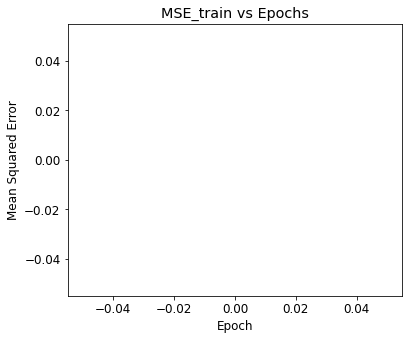

In [26]:
losses = torch_GD(inputs_train_normalised, 1.0125, normalised = True)

with mpl.rc_context({'figure.figsize': (6, 5), 'font.size': 12}):
    fig, ax = plt.subplots(figsize = (6, 5))

    ax.plot(epochs, losses)
    ax.set_title('MSE_train vs Epochs')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Mean Squared Error')

#### It is observed that the performance of the gradient descent algorithm improves as the learning rate increases upto a certain extent(around 1-1.01), beyond that value overflow error is encountered because of very large values of weights. Unstable behaviour - Moving away from the global minimum.

#### Moreover, it is also observed that we can test larger values of learning rate when batch normalisation is done. This is because all the values of each feature will stay in only the same range so the functioning of the GD algorithm is more stable.

# Solution to Question 2

## Implementing mini-batch and stochastic gradient descent.

### Part i - a. Stochastic gradient descent in Python, with normalisation. (Basically repeating question 1 - b with SGD)

In [27]:
# Function which contains the implementation of stochastic gradient descent in python
def SGD_Algo(X_train, lr, batch_size = 1, normalised = False):
    num_data_points = X_train.shape[0]
    w = np.zeros(9)
    n_epochs = 2000

    # Array containing epoch numbers and mean squared errors
    errors = []

    # Algorithm for updating the parameters of the regression model
    for epoch in range(n_epochs):
        new_indices = np.random.permutation(num_data_points)
        X_new = X_train[new_indices]
        y_new = y_train[new_indices]

        for i in range(0, num_data_points, batch_size):
            X_train_batch = X_new[i:i + batch_size, :]
            y_train_batch = y_new[i:i + batch_size]

            y_train_pred = X_train_batch@w

            w = w - (lr/batch_size)*(X_train_batch.T)@(X_train_batch@w - y_train_batch)
            break
            

        if(epoch%10 == 0):
            if normalised:
                y_train_pred = X_train_normalised@w
            else:
                y_train_pred = X_train@w
            error = MSE(y_train_pred, y_train)
            #print('MSE at epoch {}: {}'.format(epoch, error))
            errors.append(error)

    mse_train = errors[-1]
    y_test_pred = X_test_normalised@w
    mse_test = MSE(y_test_pred, y_test)
    print('For learning rate {}, final MSE for train dataset: {}'.format(lr, mse_train))
    print('For learning rate {}, final MSE for test dataset: {}'.format(lr, mse_test))
    print('\n')

    return errors


For learning rate 1e-08, final MSE for train dataset: 1588.910003339813
For learning rate 1e-08, final MSE for test dataset: 1498.0950259037827


For learning rate 1e-06, final MSE for train dataset: 1582.9057718880924
For learning rate 1e-06, final MSE for test dataset: 1492.278171555388


For learning rate 0.0001, final MSE for train dataset: 1103.1135210754196
For learning rate 0.0001, final MSE for test dataset: 1029.4276492170109


For learning rate 0.01, final MSE for train dataset: 116.4968729067848
For learning rate 0.01, final MSE for test dataset: 110.83677333022041




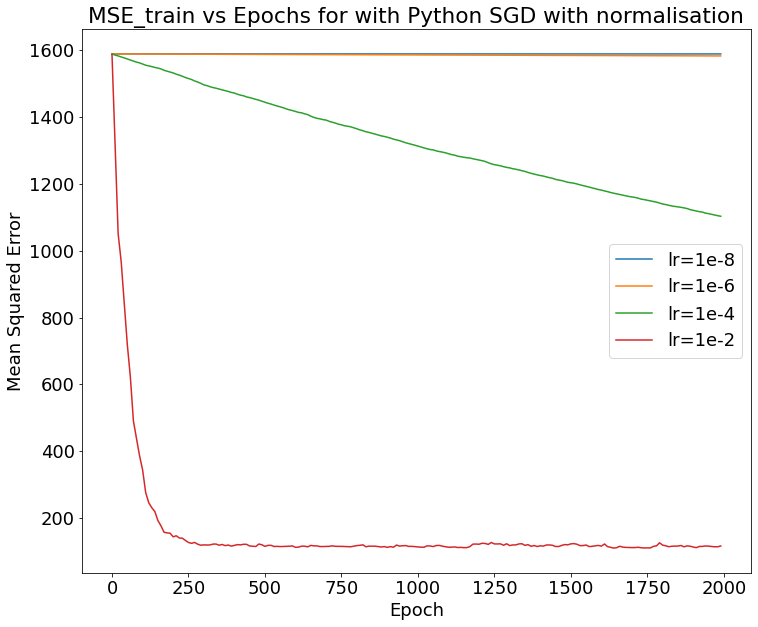

In [28]:
# We will use this array for plotting MSEs for all learning rates in a single figure
epochs = list(range(0, 2000, 10))

# Running the algorithm for different values of learning rates and plotting the errors vs epoch numbers
errors1 = SGD_Algo(X_train_normalised, 1e-8, normalised = True)
errors2 = SGD_Algo(X_train_normalised, 1e-6, normalised = True)
errors3 = SGD_Algo(X_train_normalised, 1e-4, normalised = True)
errors4 = SGD_Algo(X_train_normalised, 1e-2, normalised = True)

fig, ax = plt.subplots()

ax.plot(epochs, errors1)
ax.plot(epochs, errors2)
ax.plot(epochs, errors3)
ax.plot(epochs, errors4)

ax.set_title('MSE_train vs Epochs for with Python SGD with normalisation')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.legend(['lr=1e-8', 'lr=1e-6', 'lr=1e-4', 'lr=1e-2']);

### It is observed that there are fluctuations in the value of MSE once its value almost reaches the optimal value.
### Fluctuations seem to be small because the scale of the y-axis is quite large.

### Part i - b. implementing SGD in PyTorch with and without normalisation (Basically repeating Question 1c, which in turn asks to repeat Questions 1a and 1b).

### First, without normalisation

In [29]:
train_ds = TensorDataset(inputs_train, labels_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle = True)

In [30]:
def torch_SGD(train_dl, lr, normalised = False):
    model = nn.Linear(9, 1, dtype = torch.double)

    optimiser = torch.optim.SGD(model.parameters(), lr)

    mse_loss = nn.MSELoss()

    num_epochs = 200

    losses = []

    # Train the model

    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:

            y_pred = model(x_batch).reshape(-1)

            loss = mse_loss(y_pred, y_batch)

            optimiser.zero_grad()

            loss.backward()

            optimiser.step()

        if epoch % 10 == 0:
            y_batch_pred = model(x_batch).reshape(-1)
            loss = mse_loss(y_batch_pred, y_batch)
            losses.append(loss.item())

    mse_train = losses[-1]
    if normalised:
        outputs_test = model(inputs_test_normalised).reshape(-1)
    else:
        outputs_test = model(inputs_test).reshape(-1)
        
    mse_test = mse_loss(outputs_test, labels_test)
    print('For learning rate {}, final MSE for train dataset: {}'.format(lr, mse_train))
    print('For learning rate {}, final MSE for test dataset: {}'.format(lr, mse_test))
    print('\n')

    return losses

For learning rate 1e-09, final MSE for train dataset: 3.564195532548879
For learning rate 1e-09, final MSE for test dataset: 155.63310483349235


For learning rate 1e-08, final MSE for train dataset: 224.62744207615876
For learning rate 1e-08, final MSE for test dataset: 111.22938291289853


For learning rate 1e-07, final MSE for train dataset: 23.543826875705765
For learning rate 1e-07, final MSE for test dataset: 113.17964674381672




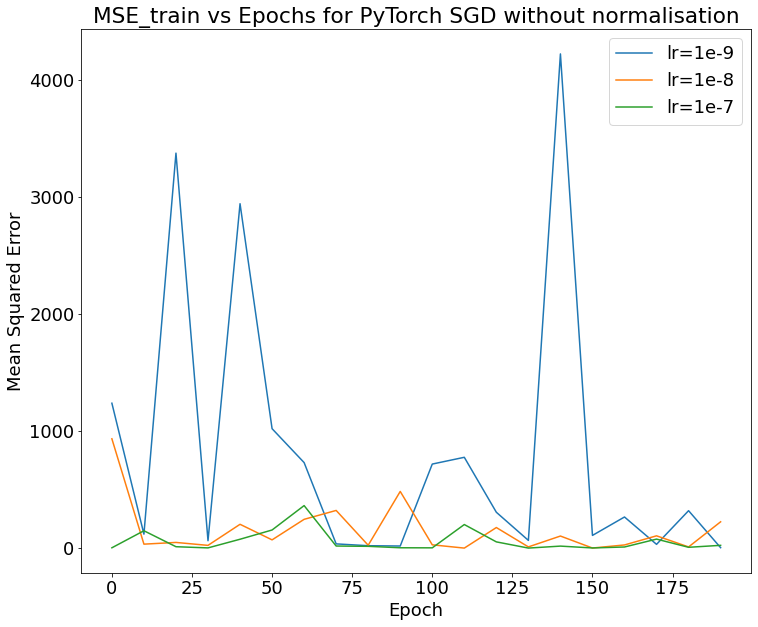

In [31]:
# We will use this array for plotting MSEs for all learning rates in a single figure
epochs = list(range(0, 200, 10))

losses1 = torch_SGD(train_dl, lr = 1e-9)
losses2 = torch_SGD(train_dl, lr = 1e-8)
losses3 = torch_SGD(train_dl, lr = 1e-7)

fig, ax = plt.subplots()

ax.plot(epochs, losses1)
ax.plot(epochs, losses2)
ax.plot(epochs, losses3)

ax.set_title('MSE_train vs Epochs for PyTorch SGD without normalisation')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.legend(['lr=1e-9', 'lr=1e-8', 'lr=1e-7']);

### Now, batch normalisation will be applied

For learning rate 1e-08, final MSE for train dataset: 5447.5317219068165
For learning rate 1e-08, final MSE for test dataset: 1504.648014541807


For learning rate 1e-06, final MSE for train dataset: 62.924121830083514
For learning rate 1e-06, final MSE for test dataset: 572.4446674369209


For learning rate 0.0001, final MSE for train dataset: 278.9579655695997
For learning rate 0.0001, final MSE for test dataset: 111.47027783680419


For learning rate 0.01, final MSE for train dataset: 111.75529372223461
For learning rate 0.01, final MSE for test dataset: 136.1409301679876




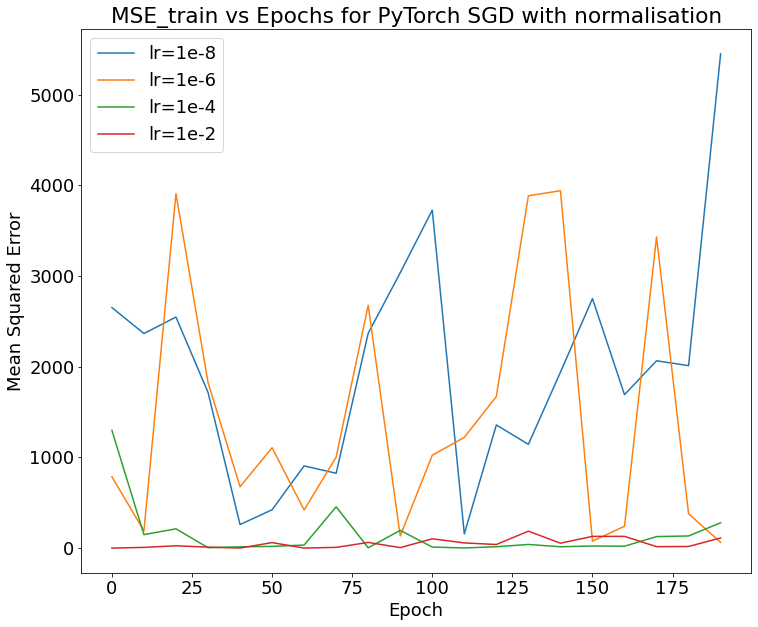

In [32]:
train_ds = TensorDataset(inputs_train_normalised, labels_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle = True)

# We will use this array for plotting MSEs for all learning rates in a single figure
epochs = list(range(0, 200, 10))

losses1 = torch_SGD(train_dl, lr = 1e-8, normalised = True)
losses2 = torch_SGD(train_dl, lr = 1e-6, normalised = True)
losses3 = torch_SGD(train_dl, lr = 1e-4, normalised = True)
losses4 = torch_SGD(train_dl, lr = 1e-2, normalised = True)

fig, ax = plt.subplots()

ax.plot(epochs, losses1)
ax.plot(epochs, losses2)
ax.plot(epochs, losses3)
ax.plot(epochs, losses4)

ax.set_title('MSE_train vs Epochs for PyTorch SGD with normalisation')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.legend(['lr=1e-8', 'lr=1e-6', 'lr=1e-4', 'lr=1e-2']);

#### It is observed that the fluctuations in the MSE is higher for the case where normalisation is applied. This can be explained by considering the fact that the graph of the cost function is uniform for all features, because all the features are in the same range. The fluctuations can happen for value of any weight, thereby increasing the chance of fluctuation of MSE. 

#### In contrast, when the values under features are in different orders of magnitude, only certain weights can update considerably, and fluctuations can happen only in those weight values. So overall there is lower fluctutation in the value of MSE compared to when normalisation is done.

#### Also note that the convergence is happening in very few epochs compared to batch gradient descent.

### Part ii - a. Implementing mini-batch gradient descent using Python, with normalisation. (Basically repeating quesion 1-b)

For learning rate 1e-08, final MSE for train dataset: 1588.9114867784128
For learning rate 1e-08, final MSE for test dataset: 1498.0964405756654


For learning rate 1e-06, final MSE for train dataset: 1582.9993138169405
For learning rate 1e-06, final MSE for test dataset: 1492.3732854150203


For learning rate 0.0001, final MSE for train dataset: 1099.5352095068329
For learning rate 0.0001, final MSE for test dataset: 1026.2458425019545


For learning rate 0.01, final MSE for train dataset: 109.25764221081586
For learning rate 0.01, final MSE for test dataset: 110.92448639087216




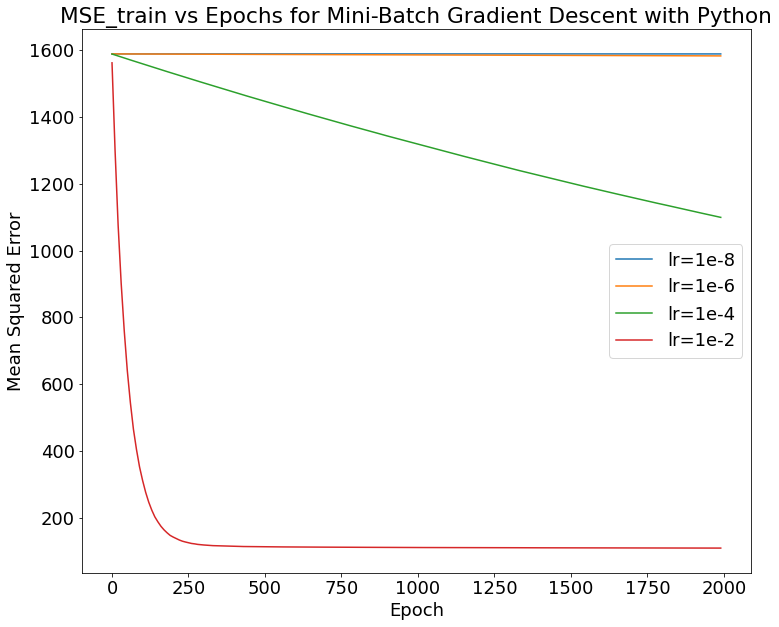

In [33]:
# We will use this array for plotting MSEs for all learning rates in a single figure
epochs = list(range(0, 2000, 10))
batch_size = 108

errors1 = SGD_Algo(X_train_normalised, 1e-8, batch_size, normalised = True)
errors2 = SGD_Algo(X_train_normalised, 1e-6, batch_size, normalised = True)
errors3 = SGD_Algo(X_train_normalised, 1e-4, batch_size, normalised = True)
errors4 = SGD_Algo(X_train_normalised, 1e-2, batch_size, normalised = True)

fig, ax = plt.subplots()

ax.plot(epochs, errors1)
ax.plot(epochs, errors2)
ax.plot(epochs, errors3)
ax.plot(epochs, errors4)

ax.set_title('MSE_train vs Epochs for Mini-Batch Gradient Descent with Python')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.legend(['lr=1e-8', 'lr=1e-6', 'lr=1e-4', 'lr=1e-2']);

### Compared to stochastic gradient descent, there are few fluctuations. 
### Again, the fluctuations seem to be very small due to the very large scale of the y-axis.

### Part ii - b Implementing mini-batch gradient descent using PyTorch.

### First, without normalisation.

For learning rate 1e-09, final MSE for train dataset: 1900.5670665965324
For learning rate 1e-09, final MSE for test dataset: 2019.3369965140962


For learning rate 1e-08, final MSE for train dataset: 1108.0078289544706
For learning rate 1e-08, final MSE for test dataset: 1110.4997356208717


For learning rate 1e-07, final MSE for train dataset: 115.51819308068328
For learning rate 1e-07, final MSE for test dataset: 132.8242973490249




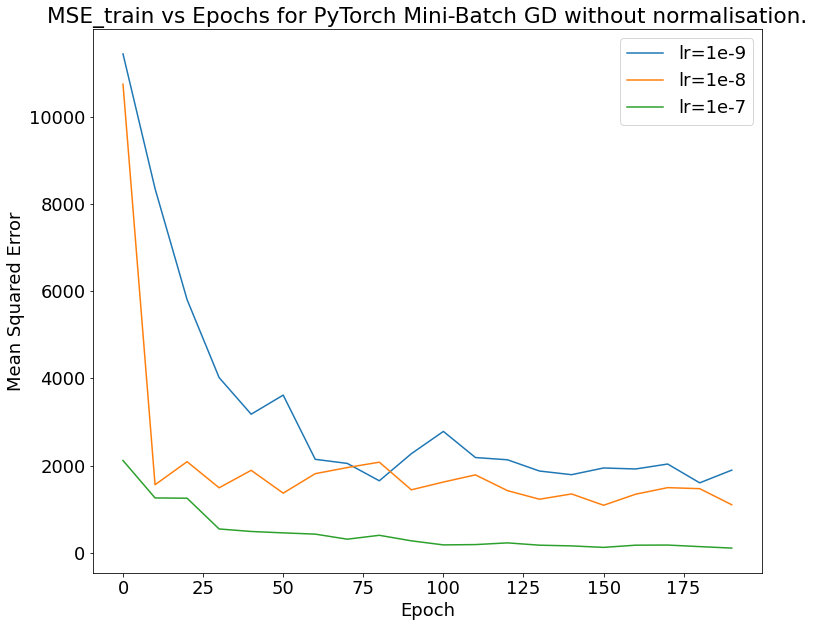

In [34]:
train_ds = TensorDataset(inputs_train, labels_train)
batch_size = 108
train_dl = DataLoader(train_ds, batch_size, shuffle = True)

# We will use this array for plotting MSEs for all learning rates in a single figure
epochs = list(range(0, 200, 10))

losses1 = torch_SGD(train_dl, lr = 1e-9)
losses2 = torch_SGD(train_dl, lr = 1e-8)
losses3 = torch_SGD(train_dl, lr = 1e-7)

fig, ax = plt.subplots()

ax.plot(epochs, losses1)
ax.plot(epochs, losses2)
ax.plot(epochs, losses3)

ax.set_title('MSE_train vs Epochs for PyTorch Mini-Batch GD without normalisation.')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.legend(['lr=1e-9', 'lr=1e-8', 'lr=1e-7']);

### Now, normalisation is applied on the data.

For learning rate 1e-08, final MSE for train dataset: 1658.15223413767
For learning rate 1e-08, final MSE for test dataset: 1513.163470362697


For learning rate 1e-06, final MSE for train dataset: 1596.1829907350195
For learning rate 1e-06, final MSE for test dataset: 1485.0216424231924


For learning rate 0.0001, final MSE for train dataset: 695.0290299222752
For learning rate 0.0001, final MSE for test dataset: 587.194379102515


For learning rate 0.01, final MSE for train dataset: 150.12487570324427
For learning rate 0.01, final MSE for test dataset: 111.48973834146452




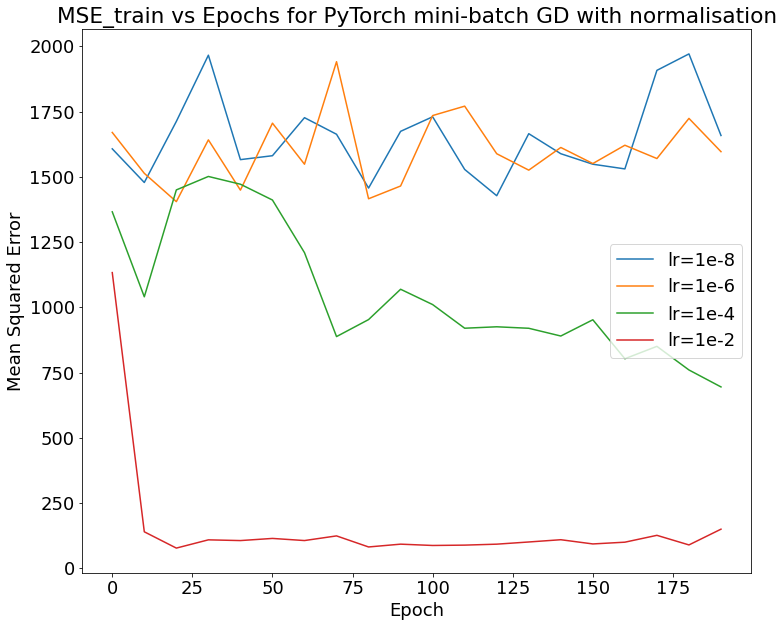

In [35]:
train_ds = TensorDataset(inputs_train_normalised, labels_train)
batch_size = 108
train_dl = DataLoader(train_ds, batch_size, shuffle = True)

# We will use this array for plotting MSEs for all learning rates in a single figure
epochs = list(range(0, 200, 10))

losses1 = torch_SGD(train_dl, lr = 1e-8, normalised = True)
losses2 = torch_SGD(train_dl, lr = 1e-6, normalised = True)
losses3 = torch_SGD(train_dl, lr = 1e-4, normalised = True)
losses4 = torch_SGD(train_dl, lr = 1e-2, normalised = True)

fig, ax = plt.subplots()

ax.plot(epochs, losses1)
ax.plot(epochs, losses2)
ax.plot(epochs, losses3)
ax.plot(epochs, losses4)

ax.set_title('MSE_train vs Epochs for PyTorch mini-batch GD with normalisation')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.legend(['lr=1e-8', 'lr=1e-6', 'lr=1e-4', 'lr=1e-2']);

#### Here also, convergence is happening in far fewer epochs compared to batch gradient descent, which generally took >1000 epochs to come quite close to the optimal value.

#### It is observed that the fluctuations in the MSE is higher for the case where normalisation is applied. This can be explained by considering the fact that the graph of the cost function is uniform for all features, because all the features are in the same range. The fluctuations can happen for value of any weight, thereby increasing the chance of fluctuation of MSE. 

#### In contrast, when the values under features are in different orders of magnitude, only certain weights can update considerably, and fluctuations can happen only in those weight values. So overall there is lower fluctutation in the value of MSE compared to when normalisation is done.

# Solution to Question 3

## 3 - Implementing Momentum Gradient Descent

### Part i - in Python

In [36]:
def GD_Algo_Mom(X_train, lr, beta = 0.75):
    w = np.zeros(9)
    z = np.zeros(9)

    n_epochs = 20000

    # Array containing epoch numbers and mean squared errors
    errors = []

    # Algorithm for updating the parameters of the regression model
    for epoch in range(n_epochs):
        y_train_pred = X_train@w

        z = beta*z + (1/N_train)*(X_train.T)@(X_train@w - y_train)

        w -= lr*z

        error = MSE(y_train_pred, y_train)

        if(epoch%1000 == 0):
            errors.append(error)

    mse_train = errors[-1]
    y_test_pred = X_test_normalised@w
    mse_test = MSE(y_test_pred, y_test)
    print('For learning rate {}, final MSE for train dataset: {}'.format(lr, mse_train))
    print('For learning rate {}, final MSE for test dataset: {}'.format(lr, mse_test))
    print('\n')

    return errors


For learning rate 1e-08, final MSE for train dataset: 1586.6957541631273
For learning rate 1e-08, final MSE for test dataset: 1495.8459872386923


For learning rate 1e-06, final MSE for train dataset: 1378.1362027512143
For learning rate 1e-06, final MSE for test dataset: 1285.389115211317


For learning rate 0.0001, final MSE for train dataset: 111.76046792016604
For learning rate 0.0001, final MSE for test dataset: 113.04219143204489


For learning rate 0.01, final MSE for train dataset: 107.25842311011503
For learning rate 0.01, final MSE for test dataset: 113.97291597970809




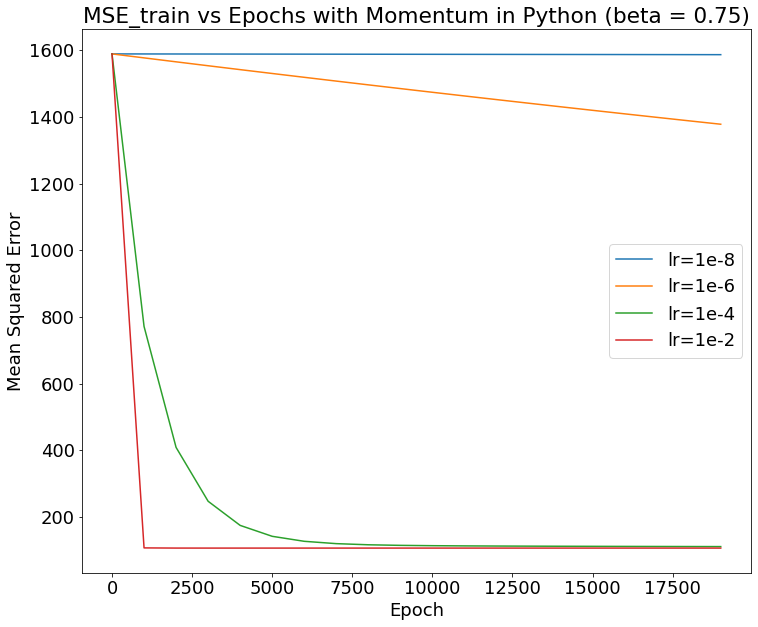

In [37]:
# We will use this array for plotting MSEs for all learning rates in a single figure
epochs = list(range(0, 20000, 1000))

errors1 = GD_Algo_Mom(X_train_normalised, 1e-8)
errors2 = GD_Algo_Mom(X_train_normalised, 1e-6)
errors3 = GD_Algo_Mom(X_train_normalised, 1e-4)
errors4 = GD_Algo_Mom(X_train_normalised, 1e-2)

fig, ax = plt.subplots()

ax.plot(epochs, errors1)
ax.plot(epochs, errors2)
ax.plot(epochs, errors3)
ax.plot(epochs, errors4)

ax.set_title('MSE_train vs Epochs with Momentum in Python (beta = 0.75)')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.legend(['lr=1e-8', 'lr=1e-6', 'lr=1e-4', 'lr=1e-2']);

### Part ii - in Pytorch

In [38]:
# NOTE: Here we are taking the entire train dataset as a batch, so it is a batch gradient descent, not mini-batch or stochastic GD

train_ds = TensorDataset(inputs_train_normalised, labels_train)
batch_size = inputs_train.shape[0]
train_dl = DataLoader(train_ds, batch_size, shuffle = True)

In [39]:
def torch_GD_Mom(train_dl, lr, nag = False):
    model = nn.Linear(9, 1, dtype = torch.double)

    optimiser = torch.optim.SGD(model.parameters(), lr, momentum = 0.75, nesterov = nag)

    mse_loss = nn.MSELoss()

    num_epochs = 20000

    losses = []

    # Train the model

    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:

            y_pred = model(x_batch).reshape(-1)

            loss = mse_loss(y_pred, y_batch)

            loss.backward()

            optimiser.step()

            optimiser.zero_grad()

        if epoch % 1000 == 0:
            losses.append(loss.item())

    mse_train = losses[-1]
    outputs_test = model(inputs_test_normalised).reshape(-1)
    mse_test = mse_loss(outputs_test, labels_test)
    print('For learning rate {}, final MSE for train dataset: {}'.format(lr, mse_train))
    print('For learning rate {}, final MSE for test dataset: {}'.format(lr, mse_test))
    print('\n')

    return losses

For learning rate 1e-08, final MSE for train dataset: 1568.8457312997111
For learning rate 1e-08, final MSE for test dataset: 1479.7999090161838


For learning rate 1e-06, final MSE for train dataset: 928.6795636019812
For learning rate 1e-06, final MSE for test dataset: 840.4584171613582


For learning rate 0.0001, final MSE for train dataset: 109.84506516822921
For learning rate 0.0001, final MSE for test dataset: 111.38049275699754


For learning rate 0.01, final MSE for train dataset: 107.25842311011506
For learning rate 0.01, final MSE for test dataset: 113.97291597990548




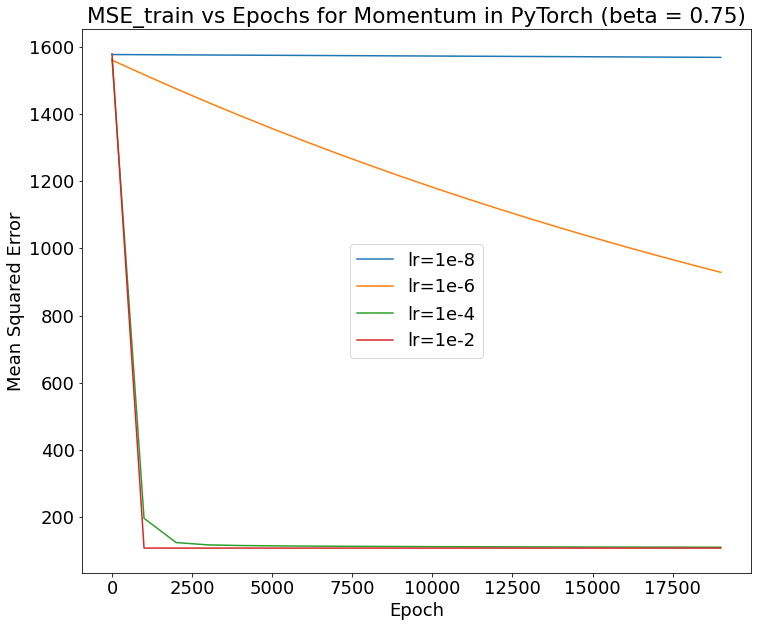

In [40]:
epochs = list(range(0, 20000, 1000))

losses1 = torch_GD_Mom(train_dl, lr = 1e-8)
losses2 = torch_GD_Mom(train_dl, lr = 1e-6)
losses3 = torch_GD_Mom(train_dl, lr = 1e-4)
losses4 = torch_GD_Mom(train_dl, lr = 1e-2)

fig, ax = plt.subplots()

ax.plot(epochs, losses1)
ax.plot(epochs, losses2)
ax.plot(epochs, losses3)
ax.plot(epochs, losses4)

ax.set_title('MSE_train vs Epochs for Momentum in PyTorch (beta = 0.75)')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.legend(['lr=1e-8', 'lr=1e-6', 'lr=1e-4', 'lr=1e-2']);

### It is observed that the implementation of momentum gradient descent in PyTorch is giving better results than that in normal Python. Convergence is faster in the PyTorch implementation than in Python implementation. Overall, it is observed that the momentum implementation converges faster than the normal gradient descent.

# Solution to Question 4

## 4 - Implementing Nesterov Accelerated Gradient Descent

### Part i - in Python

In [41]:
def GD_Algo_Mom(X_train, lr, beta = 0.75):
    w = np.zeros(9)
    z = np.zeros(9)

    n_epochs = 20000

    # Array containing epoch numbers and mean squared errors
    errors = []

    # Algorithm for updating the parameters of the regression model
    for epoch in range(n_epochs):
        y_train_pred = X_train@w 

        w_look_ahead = w + beta*z

        z = beta*z + lr*(1/N_train)*(X_train.T)@(X_train@w_look_ahead - y_train)

        w -= z

        error = MSE(y_train_pred, y_train)

        if(epoch%1000 == 0):
            errors.append(error)

    mse_train = errors[-1]
    y_test_pred = X_test_normalised@w
    mse_test = MSE(y_test_pred, y_test)
    print('For learning rate {}, final MSE for train dataset: {}'.format(lr, mse_train))
    print('For learning rate {}, final MSE for test dataset: {}'.format(lr, mse_test))
    print('\n')

    return errors


For learning rate 1e-08, final MSE for train dataset: 1586.6957540929998
For learning rate 1e-08, final MSE for test dataset: 1495.8459871677896


For learning rate 1e-06, final MSE for train dataset: 1378.135603073861
For learning rate 1e-06, final MSE for test dataset: 1285.3885155619882


For learning rate 0.0001, final MSE for train dataset: 111.76038139899379
For learning rate 0.0001, final MSE for test dataset: 113.04205198673488


For learning rate 0.01, final MSE for train dataset: 107.25842311011503
For learning rate 0.01, final MSE for test dataset: 113.97291597971254




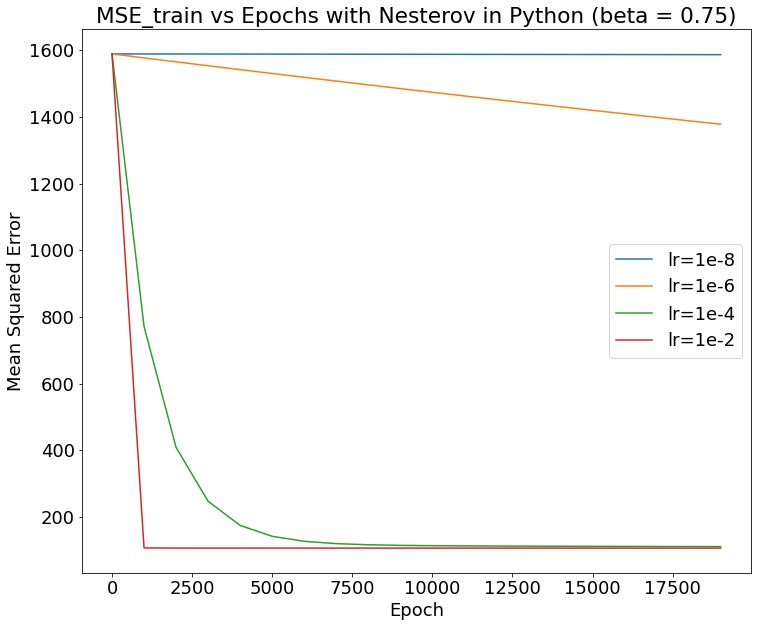

In [42]:
# We will use this array for plotting MSEs for all learning rates in a single figure
epochs = list(range(0, 20000, 1000))

errors1 = GD_Algo_Mom(X_train_normalised, 1e-8)
errors2 = GD_Algo_Mom(X_train_normalised, 1e-6)
errors3 = GD_Algo_Mom(X_train_normalised, 1e-4)
errors4 = GD_Algo_Mom(X_train_normalised, 1e-2)

fig, ax = plt.subplots()

ax.plot(epochs, errors1)
ax.plot(epochs, errors2)
ax.plot(epochs, errors3)
ax.plot(epochs, errors4)

ax.set_title('MSE_train vs Epochs with Nesterov in Python (beta = 0.75)')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.legend(['lr=1e-8', 'lr=1e-6', 'lr=1e-4', 'lr=1e-2']);

### Part ii - in PyTorch

### Note: The same function torch_GD_Mom from Question 3 will be used for the sake of brevity. The only difference is that nesterov will be set to true in the function.

In [43]:
# NOTE: Here we are taking the entire train dataset as a batch, so it is a batch gradient descent, not mini-batch or stochastic GD

train_ds = TensorDataset(inputs_train_normalised, labels_train)
batch_size = inputs_train.shape[0]
train_dl = DataLoader(train_ds, batch_size, shuffle = True)

For learning rate 1e-08, final MSE for train dataset: 1613.7317254124364
For learning rate 1e-08, final MSE for test dataset: 1521.956238787044


For learning rate 1e-06, final MSE for train dataset: 949.0991304493721
For learning rate 1e-06, final MSE for test dataset: 859.0440210854342


For learning rate 0.0001, final MSE for train dataset: 109.83258651864706
For learning rate 0.0001, final MSE for test dataset: 111.40267433186338


For learning rate 0.01, final MSE for train dataset: 107.25842311011503
For learning rate 0.01, final MSE for test dataset: 113.97291597990548




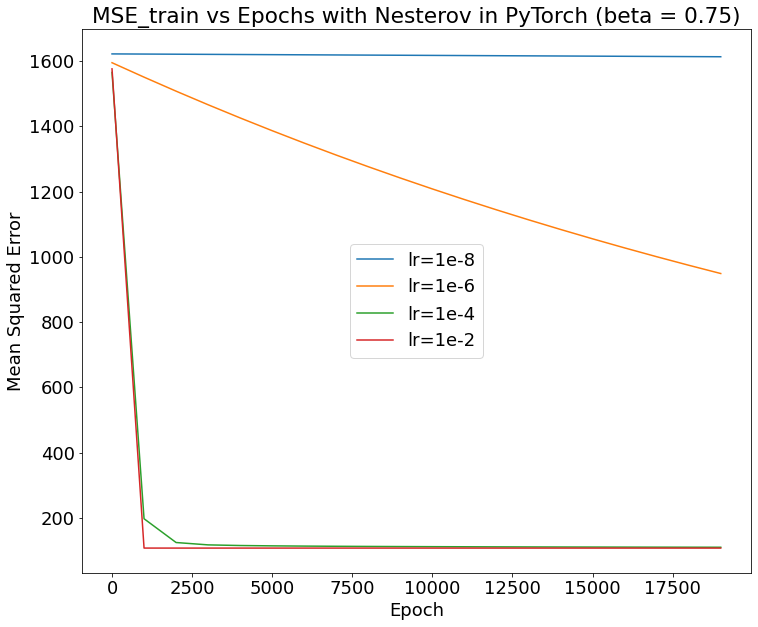

In [44]:
losses1 = torch_GD_Mom(train_dl, lr = 1e-8, nag = True)
losses2 = torch_GD_Mom(train_dl, lr = 1e-6, nag = True)
losses3 = torch_GD_Mom(train_dl, lr = 1e-4, nag = True)
losses4 = torch_GD_Mom(train_dl, lr = 1e-2, nag = True)

fig, ax = plt.subplots()

ax.plot(epochs, losses1)
ax.plot(epochs, losses2)
ax.plot(epochs, losses3)
ax.plot(epochs, losses4)

ax.set_title('MSE_train vs Epochs with Nesterov in PyTorch (beta = 0.75)')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Squared Error')
ax.legend(['lr=1e-8', 'lr=1e-6', 'lr=1e-4', 'lr=1e-2']);

### It is observed that the implementation of Nesterov Accelerated Gradient Descent in PyTorch is giving better results than that in normal Python. Convergence is faster in the PyTorch implementation than in Python implementation. Overall, it is observed that the Nesterov Accelerated Gradient Descent implementation converges faster than the normal gradient descent.

### It is also observed that the NAG implementation gives almost equally good results as momentum, but still it gives better results than the normal gradient descent implementation.